In [61]:
import tensorflow as tf

a = tf.Variable(1, name="a")
b = tf.Variable(2, name="b")
f = a + b

tf.print("The sum of a and b is", f)

The sum of a and b is 3


In [62]:

import numpy as np
from tensorflow import keras
mnist = keras.datasets.mnist

num_classes = 10 
num_features = 784 

(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train, x_test = np.array(x_train, np.float32), np.array(x_test, np.float32)

x_train, x_test = x_train.reshape([-1, num_features]), x_test.reshape([-1, num_features])

x_train, x_test = x_train / 255., x_test / 255.

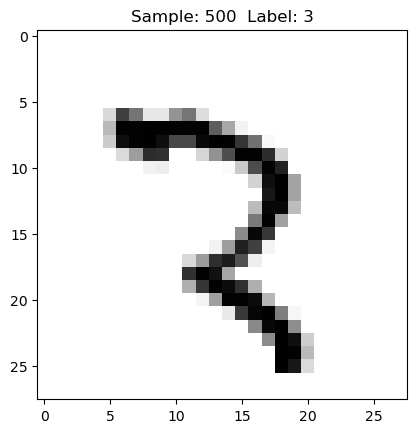

In [63]:
%matplotlib inline

import matplotlib.pyplot as plt

def display_sample(num):
    #Print this sample's label 
    label = y_train[num] 
    
    #Reshape the 784 values to a 28x28 image
    image = x_train[num].reshape([28,28])
    plt.title('Sample: %d  Label: %d' % (num, label))
    plt.imshow(image, cmap=plt.get_cmap('gray_r'))
    plt.show()
    
display_sample(500)

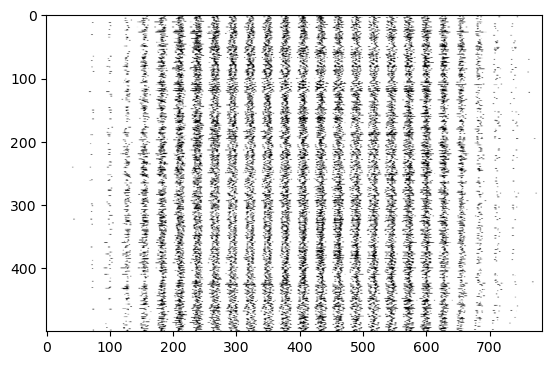

In [64]:

images = x_train[0].reshape([1,784])
for i in range(1, 500):
    images = np.concatenate((images, x_train[i].reshape([1,784])))
plt.imshow(images, cmap=plt.get_cmap('gray_r'))
plt.show()

In [92]:

learning_rate = 0.01
training_steps = 10000
batch_size = 250
display_step = 100

n_hidden = 512 

In [93]:
train_data = tf.data.Dataset.from_tensor_slices((x_train, y_train))
train_data = train_data.repeat().shuffle(60000).batch(batch_size).prefetch(1)

In [94]:
random_normal = tf.initializers.RandomNormal()

weights = {
    'h': tf.Variable(random_normal([num_features, n_hidden])),
    'out': tf.Variable(random_normal([n_hidden, num_classes]))
}
biases = {
    'b': tf.Variable(tf.zeros([n_hidden])),
    'out': tf.Variable(tf.zeros([num_classes]))
}

In [95]:
# Create model.
def neural_net(inputData):
    hidden_layer = tf.add(tf.matmul(inputData, weights['h']), biases['b'])
    hidden_layer = tf.nn.sigmoid(hidden_layer)
    
    out_layer = tf.matmul(hidden_layer, weights['out']) + biases['out']
    return tf.nn.softmax(out_layer)

In [96]:
def cross_entropy(y_pred, y_true):
    y_true = tf.one_hot(y_true, depth=num_classes)
    y_pred = tf.clip_by_value(y_pred, 1e-9, 1.)
    return tf.reduce_mean(-tf.reduce_sum(y_true * tf.math.log(y_pred)))

In [97]:
optimizer = tf.keras.optimizers.SGD(learning_rate)

def run_optimization(x, y):
    with tf.GradientTape() as g:
        pred = neural_net(x)
        loss = cross_entropy(pred, y)

    trainable_variables = list(weights.values()) + list(biases.values())

    gradients = g.gradient(loss, trainable_variables)
    
    optimizer.apply_gradients(zip(gradients, trainable_variables))

In [98]:
def accuracy(y_pred, y_true):
    correct_prediction = tf.equal(tf.argmax(y_pred, 1), tf.cast(y_true, tf.int64))
    return tf.reduce_mean(tf.cast(correct_prediction, tf.float32), axis=-1)

In [99]:
for step, (batch_x, batch_y) in enumerate(train_data.take(training_steps), 1):
    run_optimization(batch_x, batch_y)
    
    if step % display_step == 0:
        pred = neural_net(batch_x)
        loss = cross_entropy(pred, batch_y)
        acc = accuracy(pred, batch_y)
        print("Training epoch: %i, Loss: %f, Accuracy: %f" % (step, loss, acc))

Training epoch: 100, Loss: 365.346161, Accuracy: 0.588000
Training epoch: 200, Loss: 101.220856, Accuracy: 0.920000
Training epoch: 300, Loss: 52.475922, Accuracy: 0.936000
Training epoch: 400, Loss: 26.000851, Accuracy: 0.980000
Training epoch: 500, Loss: 52.426121, Accuracy: 0.952000
Training epoch: 600, Loss: 45.626106, Accuracy: 0.940000
Training epoch: 700, Loss: 42.464455, Accuracy: 0.940000
Training epoch: 800, Loss: 31.646580, Accuracy: 0.956000
Training epoch: 900, Loss: 22.577885, Accuracy: 0.980000
Training epoch: 1000, Loss: 19.265127, Accuracy: 0.984000
Training epoch: 1100, Loss: 21.675581, Accuracy: 0.984000
Training epoch: 1200, Loss: 24.532564, Accuracy: 0.980000
Training epoch: 1300, Loss: 18.476765, Accuracy: 0.980000
Training epoch: 1400, Loss: 19.518436, Accuracy: 0.984000
Training epoch: 1500, Loss: 22.386856, Accuracy: 0.984000
Training epoch: 1600, Loss: 12.032524, Accuracy: 0.992000
Training epoch: 1700, Loss: 19.228874, Accuracy: 0.980000
Training epoch: 1800,

In [100]:
pred = neural_net(x_test)
print("Test Accuracy: %f" % accuracy(pred, y_test))

Test Accuracy: 0.971000


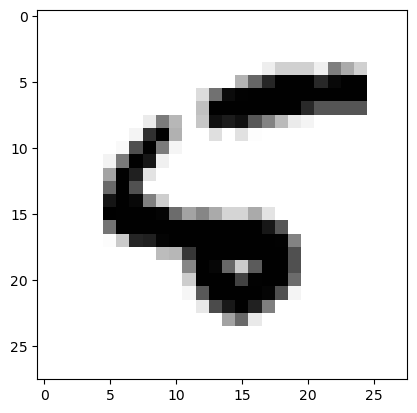

Original Labels: 5
Model prediction: 6


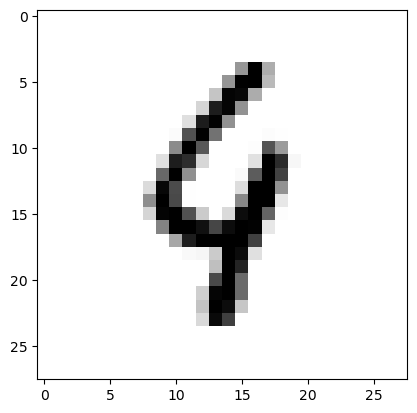

Original Labels: 4
Model prediction: 9


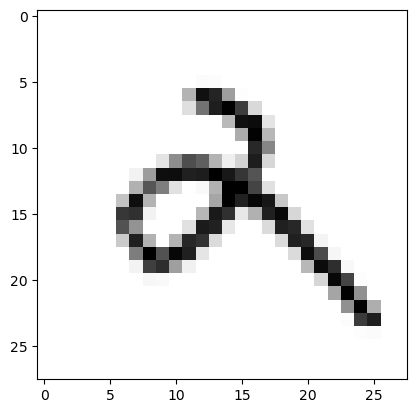

Original Labels: 2
Model prediction: 9


In [101]:
n_images = 200
test_images = x_test[:n_images]
test_labels = y_test[:n_images]
predictions = neural_net(test_images)

for i in range(n_images):
    model_prediction = np.argmax(predictions.numpy()[i])
    if (model_prediction != test_labels[i]):
        plt.imshow(np.reshape(test_images[i], [28, 28]), cmap='gray_r')
        plt.show()
        print("Original Labels: %i" % test_labels[i])
        print("Model prediction: %i" % model_prediction)